In [14]:
from numpy import random
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt

## Постановка задачи
Сгенерировать выборки размером 20 и 100 элементов.
Построить для них боксплот Тьюки.
Для каждого распределения определить долю выбросов экспериментально (сгенерировав выборку, соответствующую распределению 1000
раз, и вычислив среднюю долю выбросов) и сравнить с результатами, полученными теоретически.

In [15]:
sample_size = [20,100]
loc, scale = 0.0, 1.0
EXP_NUM = 3

In [34]:
def norm(size):
    return random.normal(loc, scale, size)

def cauchy(size):
    return random.standard_cauchy(size)

def laplace(size):
    return random.laplace(loc, 1 / np.sqrt(2), size)

def poisson(size):
    return random.poisson(10, size)

def uniform(size):
    return  random.uniform(-np.sqrt(3), np.sqrt(3), size)

distribution_fun = { 'norm' : norm,
                     'cauchy' : cauchy,
                     'laplace' : laplace,
                     'poisson' : poisson,
                     'uniform' : uniform, }

## Построение боксплота Тьюки

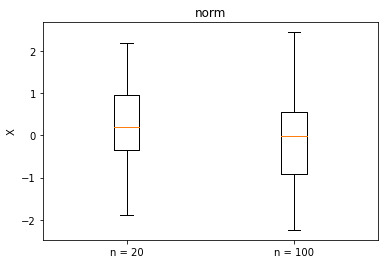

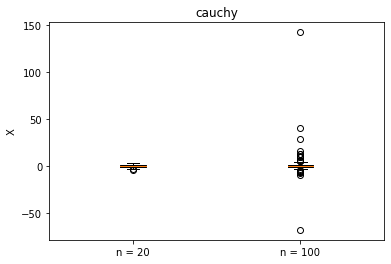

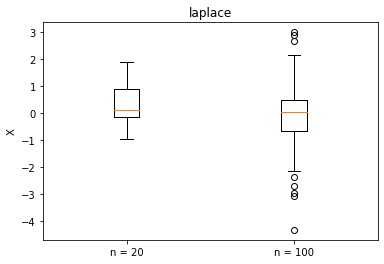

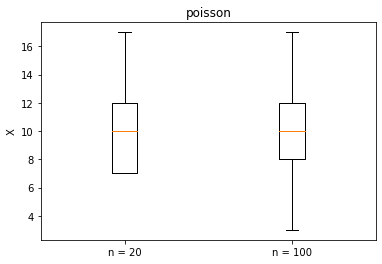

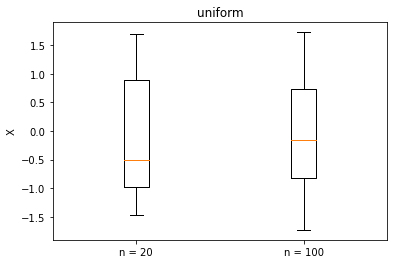

In [17]:
for dist in distribution_fun:
    sample_20 = distribution_fun[dist](20)
    sample_100 = distribution_fun[dist](100)
    plt.boxplot((sample_20, sample_100), labels=["n = 20", "n = 100"])
    plt.ylabel("X")
    plt.title(dist)
    plt.show()    

## Определение доли выбросов

In [18]:
def findMinBoarder(sample):
    return np.quantile(sample, 0.25) - 1.5 * (np.quantile(sample, 0.75) - np.quantile(sample, 0.25))

def findMaxBoarder(sample):
    return np.quantile(sample, 0.25) + 1.5 * (np.quantile(sample, 0.75) - np.quantile(sample, 0.25))

In [19]:
def findEjectionFraction(sample, min, max):
    result = 0
    for el in sample:
        if el < min or el > max:
            result+=1
    return result

In [40]:
header = ["Выборка", "Доля выбросов"]
rows = []
    
for size in sample_size:
    for dist in distribution_fun:
        ejection = 0
        for i in range(EXP_NUM):
            sample = distribution_fun[dist](size)
            min = findMinBoarder(sample)
            max = findMaxBoarder(sample)

            ejection += findEjectionFraction(sample, min, max)

        ejection/=EXP_NUM

        rows.append([dist + ", n = " + str(size), np.around(ejection / size, decimals=2)])
    rows.append("")

print(tabulate(rows, header))

    
        

Выборка             Доля выбросов
----------------  ---------------
norm, n = 20                 0.12
cauchy, n = 20               0.27
laplace, n = 20              0.2
poisson, n = 20              0.03
uniform, n = 20              0

norm, n = 100                0.14
cauchy, n = 100              0.21
laplace, n = 100             0.18
poisson, n = 100             0.07
uniform, n = 100             0.04

